<a href="https://colab.research.google.com/github/Tahimi/convectionDiffusion/blob/main/advectionDiffusionSource1D_FipyFiniteVolume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install fipy
# uncomment to install fipy then restart the runtime environment

In [2]:
import numpy as np
from fipy import *

In [3]:
# space discretization
xL = 0.
xR = 10.
dx = 0.1
delX = xR - xL
nx = int(delX/dx)
mesh = Grid1D(nx=nx, dx=dx) + xL

In [4]:
# time discretization
# advection
Cr = 0.2 # Courant Number: Cr = u*dt/dx
u = 20.
dtAdv = Cr*dx/u
# diffusion
Fr = 0.4 # Fourier Number: Fr = D*dt/dx**2
D = 4.
dtDiff = Fr*dx**2/D
# advectionDiffusion
dt = min(dtAdv, dtDiff)
print('dtAdv = ', dtAdv, '\n'
      'dtDiff = ', dtDiff, '\n'
      'dt = min(dtAdv, dtDiff) = ', dt)
# simulation time
delT = 0.3
stepsNbr = int(delT/dt)

dtAdv =  0.0010000000000000002 
dtDiff =  0.0010000000000000002 
dt = min(dtAdv, dtDiff) =  0.0010000000000000002


In [5]:
# initialization
yMin = 0.
yMax = 1.
xs1 = 2.21 # source coordinate

def initialize():
    # unkown's initialization
    global mesh, yMin, yInit, y
    yInit = CellVariable(mesh=mesh, value=yMin)
    y = CellVariable(mesh=mesh, value=yInit)

    # preparing the SourceTerm
    # obs. at the closest grid cell to point of coordinate xs1
    global xs1, yMax
    ds1 = DistanceVariable(mesh = mesh,
                           value = numerix.sqrt((mesh.x-xs1)**2))
    s1Mask = (ds1 == ds1.min())
    s1Value = yMax
    largeValue = 1e+10
    SourceTerm1 = - ImplicitSourceTerm(s1Mask * largeValue) \
                + s1Mask * largeValue * s1Value

    # Applying noFlow BC
    y.faceGrad.constrain((0,), where=mesh.exteriorFaces)

    # Defining the discritized equation
    global u, D, eq
    eq = (TransientTerm(coeff=1.0)
       + PowerLawConvectionTerm(coeff=(u,))
       == DiffusionTerm(coeff=D) + SourceTerm1)

In [6]:
# defining the time-step update function
def advectAndDiffuse1(y, dt):
    eq.solve(var=y, dt=dt)

In [7]:
# displaying some parameters
print('dx = ', "{:.2e}".format(dx), '\n'
      'delX = ', delX, '\n'
      'nx = ', nx, '\n'
      'Cr = ', Cr, '\n'
      'u = ', u, '\n'
      'dtAdv = ', "{:.2e}".format(dtAdv), '\n'
      'Fr = ', Fr, '\n'
      'D = ', D, '\n'
      'dtDiff = ', "{:.2e}".format(dtDiff), '\n'
      'dt = min(dtAdv,dtDiff) = ', "{:.2e}".format(dt), '\n'
      'delT = ', delT, '\n'
      'stepsNbr = ', stepsNbr)

dx =  1.00e-01 
delX =  10.0 
nx =  100 
Cr =  0.2 
u =  20.0 
dtAdv =  1.00e-03 
Fr =  0.4 
D =  4.0 
dtDiff =  1.00e-03 
dt = min(dtAdv,dtDiff) =  1.00e-03 
delT =  0.3 
stepsNbr =  299


In [8]:
# initialize and iterate in time
initialize()
for step in range(stepsNbr):
    eq.solve(var=y, dt=dt)

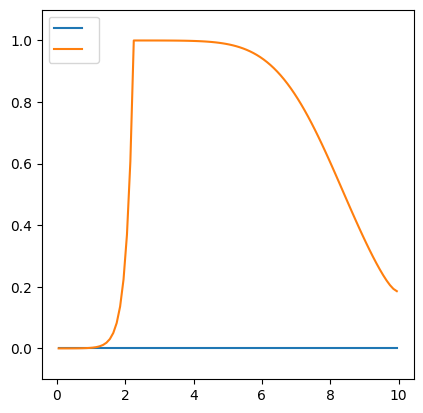

In [9]:
# ploting the simulation results
viewer = Viewer(vars = (yInit, y),
                datamin = min(yInit.min(), y.min())-.1,
                datamax = max(yInit.max(), y.max())+.1)
viewer.plot()